In [1]:
import pandas as pd
import numpy as np

from sklearn import svm

import matplotlib.pyplot as plt
import seaborn

In [2]:
df = pd.read_csv("analysis/13141516.csv")

In [11]:
ga_params = df[['P12','P13','P14','P15']].as_matrix()
wait_avg = df['kpi7_avg'].as_matrix()

In [16]:
print("input shape: ", ga_params.shape)
print("target shape: ", wait_avg.shape)

input shape:  (14187, 4)
target shape:  (14187,)


In [10]:
df

,#name,id,P12,P13,P14,P15,kpi7_avg,kpi7_max,Unnamed: 8
0,NaN,1,95,60,30,0,26,31,True
1,NaN,2,95,60,30,1,26,29,True
2,NaN,3,95,60,30,2,26,29,True
3,NaN,4,95,60,30,4,26,31,True
4,NaN,5,95,60,30,5,26,31,True
5,NaN,6,95,60,30,7,26,28,True
6,NaN,7,95,60,30,8,26,30,True
7,NaN,8,95,60,30,10,26,33,True
8,NaN,9,95,60,37,0,25,30,True
9,NaN,10,95,60,37,1,26,33,True


In [17]:
regr = svm.SVR()

In [18]:
regr.fit(ga_params, wait_avg)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
regr.score(ga_params, wait_avg)

0.63811278489392076

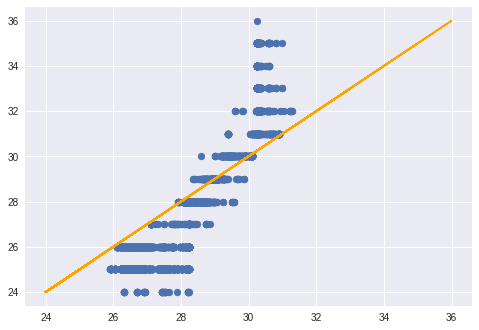

In [27]:
plt.scatter(regr.predict(ga_params), wait_avg)
plt.plot(wait_avg, (lambda x: x)(wait_avg),color='orange')
plt.show()

In [23]:
min(wait_avg)

24

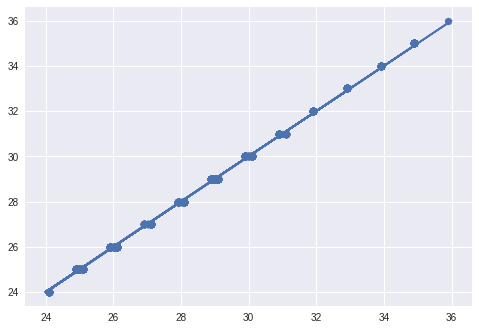

In [25]:
regr_c = svm.SVR(C=1e3)
regr_c.fit(ga_params,wait_avg)


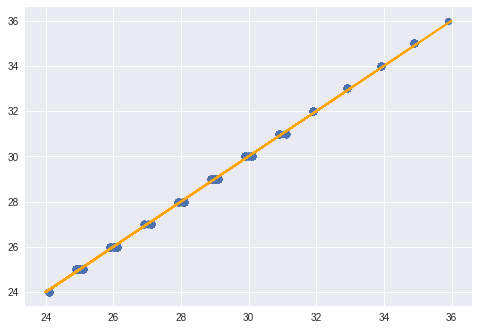

In [26]:
plt.scatter(regr_c.predict(ga_params), wait_avg)
plt.plot(wait_avg, (lambda x: x)(wait_avg), color='orange')
plt.show()

In [30]:
regr_c.score(ga_params, wait_avg)

0.99836718908328415

In [31]:
from sklearn.cross_validation import cross_val_score

In [33]:
cross_val_score(regr_c, ga_params, wait_avg,cv = 10)

array([-1.18982294, -0.89056972, -0.45935778, -0.92156493, -0.17180217,
       -0.59552069, -0.15200566, -0.10956671, -0.20840635, -0.24319313])

In [34]:
cross_val_score(regr, ga_params, wait_avg, cv=10)

array([-0.85854256, -0.63301529, -0.26218471, -0.63608493, -0.07219641,
       -0.87099525, -0.30925181, -0.25584594, -0.39615311, -0.44608986])

In [35]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(ga_params, wait_avg, test_size=0.1, random_state=2)

In [46]:
regr_c_0 = svm.SVR(C=1e2).fit(x_train,y_train)

In [47]:
regr_c_0.score(x_test,y_test)

0.42243341651070609

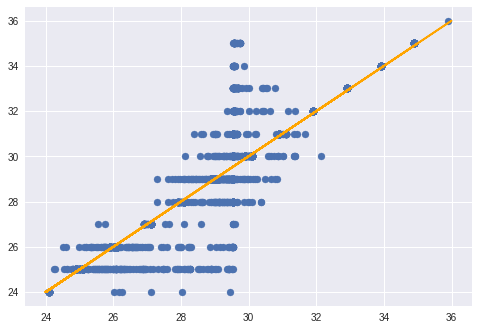

In [48]:
plt.scatter(regr_c_0.predict(ga_params), wait_avg)
plt.plot(wait_avg, (lambda x: x)(wait_avg), color='orange')
plt.show()